<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Gradient%20Descent/Convolutional_Neural_Networks_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries:

* tensorflow for deep learning operations.
* tensorflow.keras.datasets.cifar10 to load the CIFAR-10 dataset.
* tensorflow.keras.models.Sequential to define a sequential model.
* tensorflow.keras.layers for various layers in the model.
* tensorflow.keras.optimizers.SGD for stochastic gradient descent optimizer.
* matplotlib.pyplot for data visualization.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

Loading and preprocessing the CIFAR-10 dataset:

* The CIFAR-10 dataset is loaded using cifar10.load_data().
* The dataset is split into training and testing sets: (X_train, y_train) and (X_test, y_test).
* The pixel values of the images are normalized between 0 and 1 by dividing by 255.

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Normalize the pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


Defining the CNN architecture:

* A sequential model is initialized using Sequential().
* Convolutional layers are added to the model using Conv2D(). The specified * parameters include the number of filters, kernel size, activation function, and padding.
* Max pooling layers are added using MaxPooling2D() to downsample the feature maps.
* The Flatten() layer is added to convert the 2D feature maps into a 1D vector.
* Dense layers (fully connected layers) are added using Dense(). The specified parameters include the number of units/neurons and the activation function.
* The output layer uses Dense() with softmax activation for multi-class classification.


In [5]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


Compiling the model:

* The model is compiled using compile() with the specified optimizer, loss function, and metrics.
* The optimizer used is stochastic gradient descent (SGD) with a learning rate of 0.01.
* The loss function is set to 'sparse_categorical_crossentropy' for multi-class classification.
* Accuracy is used as a metric to evaluate the model during training.

In [6]:
# Compile the model
model.compile(optimizer=SGD(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Training the model:

* The model is trained using fit() with the training data (X_train and y_train).
* The number of epochs (iterations over the entire dataset), batch size, and validation data (X_test and y_test) are specified.


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 2.1291 - accuracy: 0.2324 - val_loss: 2.2444 - val_accuracy: 0.1795
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 1.6945 - accuracy: 0.3974 - val_loss: 1.7000 - val_accuracy: 0.3986
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.5207 - accuracy: 0.4562 - val_loss: 1.6209 - val_accuracy: 0.4182
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4225 - accuracy: 0.4917 - val_loss: 1.3743 - val_accuracy: 0.5141
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.3268 - accuracy: 0.5253 - val_loss: 1.5766 - val_accuracy: 0.4149
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2419 - accuracy: 0.5577 - val_loss: 1.5804 - val_accuracy: 0.4593
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 1.1663 - accuracy: 0.5858 - val_loss: 1.4190 - val_accuracy: 0.5026
Epoch 

Plotting the training and validation accuracy:

* The training and validation accuracy values are extracted from the training history.
* The accuracy values are plotted over the epochs to visualize the model's performance.
* The plot() function from matplotlib.pyplot is used for plotting.
* The x-axis represents the epochs, and the y-axis represents the accuracy.
* A legend is added to distinguish between training and validation accuracy.

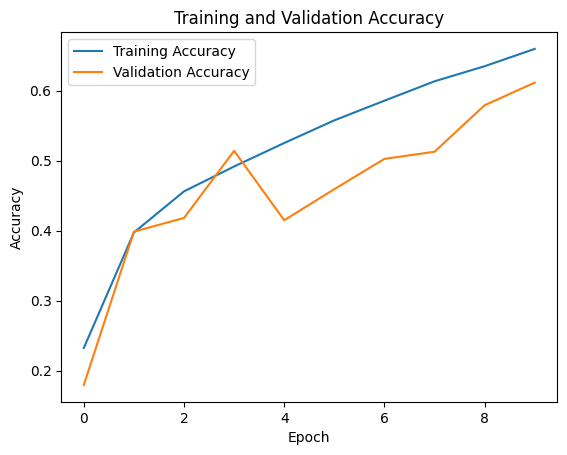

In [8]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Plotting the training and validation loss:
* This code plots the training and validation loss over the epochs. It helps to visualize how the loss changes during training and can provide insights into the model's convergence.

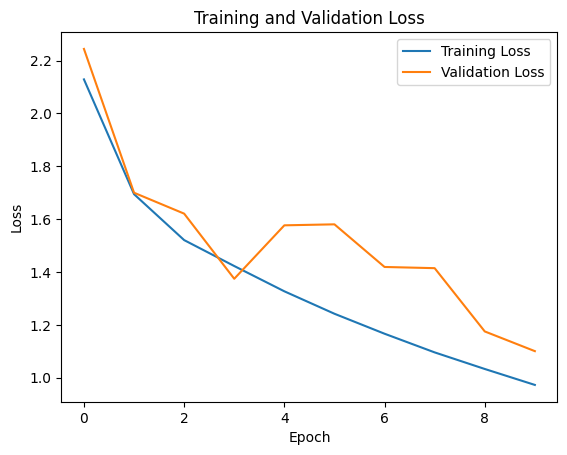

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Visualizing convolutional filters:
* This code visualizes the learned convolutional filters in a specific layer of the model. It retrieves the filter weights using model.layers[layer_index].get_weights()[0] and plots them using subplots. It can help in understanding the learned features by the convolutional layers.

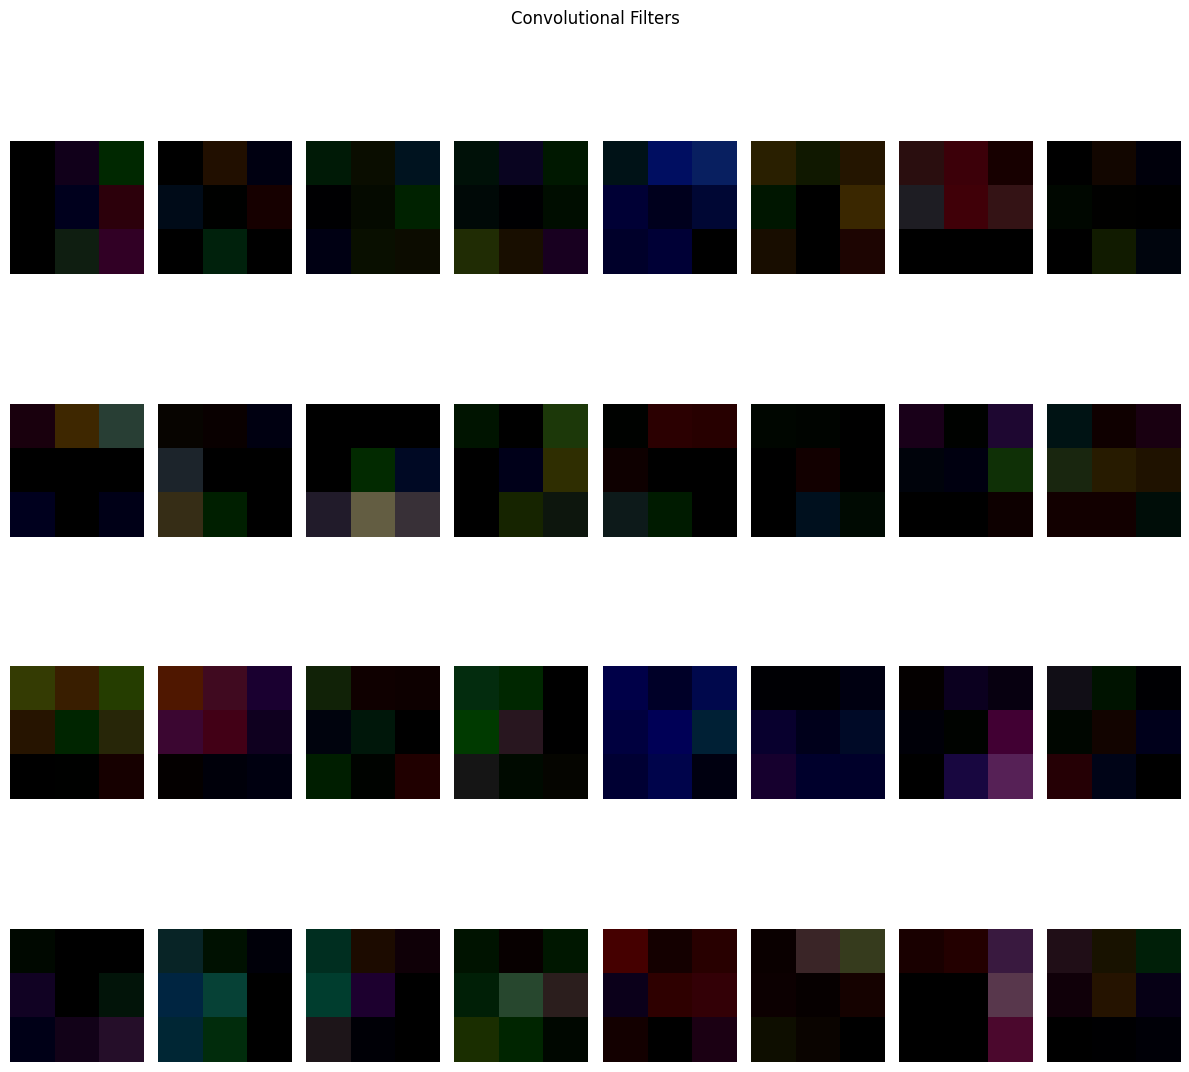

In [10]:
layer_index = 0  # Choose a convolutional layer index
filters = model.layers[layer_index].get_weights()[0]

fig, axes = plt.subplots(filters.shape[3] // 8, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(filters[:, :, :, i], cmap='gray')
    ax.axis('off')

plt.suptitle('Convolutional Filters')
plt.tight_layout()
plt.show()
